# Homework 5, Part 1: Building a pandas cheat sheet

**Use `animals.csv` to answer the following questions.** The data is small and the questions are pretty simple, so hopefully you can use this for pandas reference in the future.

## 0) Setup

Import pandas **with the correct name** and set `matplotlib` to always display graphics in the notebook.

In [2]:
import pandas as pd

%matplotlib inline

## 1) Reading in a csv file

Use pandas to read in the animals CSV file, saving it as a variable with the normal name for a dataframe

In [5]:
df = pd.read_csv("animals.csv")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [15]:
## Rows, columns

df.shape

(7, 3)

In [10]:
df.animal.describe()

count       7
unique      2
top       cat
freq        4
Name: animal, dtype: object

In [13]:
df.name.describe()

count         7
unique        7
top       Devon
freq          1
Name: name, dtype: object

In [14]:
df.length.describe()

count     7.000000
mean     38.857143
std      17.101935
min      10.000000
25%      33.500000
50%      35.000000
75%      47.500000
max      65.000000
Name: length, dtype: float64

## 3) Display the first 3 animals

Hmmm, we know how to take the first 5, but maybe the first 3. Maybe there is an option to change how many you get? Use `?` to check the documentation on the command.

In [16]:
df.head(3)

,animal,name,length
0,cat,Anne,35
1,cat,Bob,45
2,dog,Egglesburg,65


## 4) Sort the animals to show me the 3 longest animals

> **TIP:** You can use `.head()` after you sort things!

In [18]:
df.head(3).sort_values(by='length', ascending=False)

,animal,name,length
2,dog,Egglesburg,65
1,cat,Bob,45
0,cat,Anne,35


## 5) Get the mean and standard deviation of animal lengths

You can do this with separate commands or with a single command.

In [19]:
df.length.describe()

count     7.000000
mean     38.857143
std      17.101935
min      10.000000
25%      33.500000
50%      35.000000
75%      47.500000
max      65.000000
Name: length, dtype: float64

## 6) How many cats do we have and how many dogs?

You only need one command to do this

In [28]:
df.animal.value_counts()

cat    4
dog    3
Name: animal, dtype: int64

## 7) Only display the dogs

> **TIP:** It's probably easiest to make it display the list of `True`/`False` first, then wrap the `df[]` around it.

In [30]:
df[df.animal == 'dog']

,animal,name,length
2,dog,Egglesburg,65
3,dog,Devon,50
5,dog,Fontaine,35


## 8) Only display the animals that are longer than 40cm

In [31]:
df[df.length > 40]

,animal,name,length
1,cat,Bob,45
2,dog,Egglesburg,65
3,dog,Devon,50


## 9) `length` is the animal's length in centimeters. Create a new column called `inches` that is the length in inches.

In [37]:
df['inches'] = df.length / 2.54
df.head(2)

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535


## 10) Save the cats to a separate variable called `cats`. Save the dogs to a separate variable called `dogs`.

This is the same as listing them, but you just save the result to a variable instead of looking at it. Be sure to use `.head()` to make sure your data looks right.

Once you do this, every time you use `cats` you'll only be talking about the cats, and same for the dogs.

In [57]:
cats = df[df.animal == 'cat']
dogs = df[df.animal == 'dog']

In [58]:
cats

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425
6,cat,Xypher,10,3.937008


In [59]:
dogs

,animal,name,length,inches
2,dog,Egglesburg,65,25.590551
3,dog,Devon,50,19.685039
5,dog,Fontaine,35,13.779528


## 11) Display all of the animals that are cats and above 12 inches long.

First do it using the `cats` variable, then also do it using your `df` dataframe.

> **TIP:** For multiple conditions, you use `df[(one condition) & (another condition)]`

In [60]:
df[(df.animal=='cat') & (df.inches > 12)]

,animal,name,length,inches
0,cat,Anne,35,13.779528
1,cat,Bob,45,17.716535
4,cat,Charlie,32,12.598425


## 12) What's the mean length of a cat? What's the mean length of a dog?

In [70]:
cats.length.mean()

30.5

In [71]:
df[df.animal == 'cat'].length.mean()

30.5

In [72]:
dogs.length.mean()

50.0

In [73]:
df[df.animal == 'dog'].length.mean()

50.0

## 13) If you didn't already, use `groupby` to do #12 all at once

In [74]:
df.groupby(by='animal').length.mean()

animal
cat    30.5
dog    50.0
Name: length, dtype: float64

## 14) Make a histogram of the length of dogs.

We didn't talk about how to make a histogram in class! It **does not** use `plot()`. Imagine you're a programmer who doesn't want to type out `histogram` - what do you think you'd type instead?

> **TIP:** The method is four letters long
>
> **TIP:** First you'll say "I want the length column," then you'll say "make a histogram"
>
> **TIP:** This is the worst histogram ever

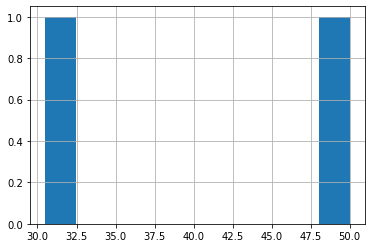

In [76]:
df.groupby(by='animal').length.mean().hist()

## 15) Make a horizontal bar graph of the length of the animals, with the animal's name as the label

> **TIP:** It isn't `df['length'].plot()`, because it needs *both* columns. Think about how we did the scatterplot in class.
>
> **TIP:** Which is the `x` axis and which is the `y` axis? You'll notice pandas is kind of weird and wrong.
>
> **TIP:** Make sure you specify the `kind` of graph or else it will be a weird line thing
>
> **TIP:** If you want, you can set a custom size for your plot by sending it something like `figsize=(15,2)`

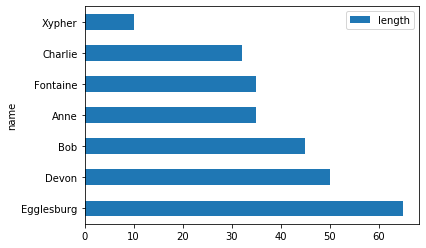

In [97]:
df.sort_values('length', ascending=False).plot(x='name', y='length', kind='barh')

## 16) Make a sorted horizontal bar graph of the cats, with the larger cats on top

> **TIP:** Think in steps, even though it's all on one line - first make sure you can sort it, then try to graph it.

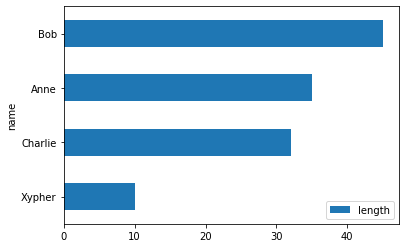

In [99]:
cats.sort_values('length').plot(x='name', y='length', kind='barh')

## 17) As a reward for getting down here: run the following code, then plot the number of dogs vs. the number of cats

> **TIP:** Counting the number of dogs and number of cats does NOT use `.groupby`! That's only for calculations.
>
> **TIP:** You can set a title with `title="Number of animals"`

In [100]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

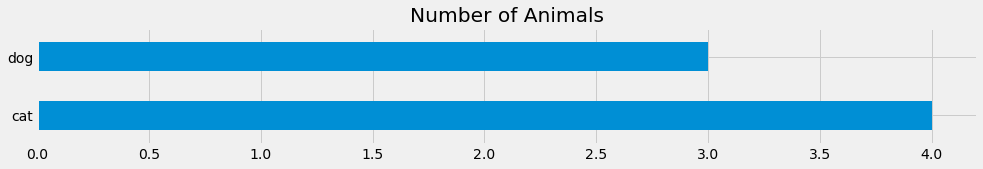

In [109]:
df.animal.value_counts().plot(kind='barh', title='Number of Animals', figsize=(15,2))